### WINE QUALITY PREDICTION
Machine learning has transformed the wine industry by helping predict wine quality more accurately. By analyzing different chemical features, these models provide useful insights to improve production. Although challenges exist, the advantages of using ML clearly outweigh the limitations.

The dataset contains wine ingredients along with quality scores, making it suitable for prediction. This project focuses on classifying wine quality using physicochemical properties, after handling missing values and outliers. 

The aim is to build a reliable machine learning model that predicts wine quality as good, average, or bad based on physicochemical properties. By analyzing these features, the model can help understand factors affecting wine quality and support better production decisions

DATA LOADING AND PREPROCESSING

In [1]:
import pandas as pd
df = pd.read_excel('wine_quality_project.xlsx')
df




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,NaN,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5
2,7.8,0.760,NaN,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5
3,11.2,0.280,NaN,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6
4,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5
...,...,...,...,...,...,...,...,...,...,...,...,...
12492,7.5,0.291,0.36,15.59,0.051,29.3,123.1,0.99671,3.06,0.54,10.396982,5
12493,8.0,0.570,0.23,3.23,0.072,17.1,119.8,0.99678,3.26,0.57,9.289130,5
12494,7.7,0.245,0.30,1.42,0.042,15.3,NaN,0.99297,3.26,0.53,10.413116,6
12495,11.8,0.330,0.49,3.52,0.094,54.1,79.6,1.00025,3.30,0.76,10.678025,7


In [2]:
df.shape

(12497, 12)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12497 entries, 0 to 12496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         12372 non-null  float64
 1   volatile acidity      12497 non-null  float64
 2   citric acid           12185 non-null  float64
 3   residual sugar        12435 non-null  float64
 4   chlorides             12497 non-null  float64
 5   free sulfur dioxide   12435 non-null  float64
 6   total sulfur dioxide  12372 non-null  float64
 7   density               12497 non-null  float64
 8   pH                    12372 non-null  float64
 9   sulphates             12497 non-null  float64
 10  alcohol               12497 non-null  float64
 11  quality               12497 non-null  int64  
dtypes: float64(11), int64(1)
memory usage: 1.1 MB


In [4]:
df.isna().sum() / len(df) * 100

fixed acidity           1.000240
volatile acidity        0.000000
citric acid             2.496599
residual sugar          0.496119
chlorides               0.000000
free sulfur dioxide     0.496119
total sulfur dioxide    1.000240
density                 0.000000
pH                      1.000240
sulphates               0.000000
alcohol                 0.000000
quality                 0.000000
dtype: float64

In [5]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
for i in df.columns:
    print(df[i].unique(),':-',i)
    print('*'*100)

[ 7.4  7.8 11.2  7.9  7.3  7.5  6.7  5.6  8.9  8.5  8.1  7.6  6.9  6.3
  7.1  8.3  5.2  5.7  8.8  6.8  4.6  7.7  8.7  6.4  6.6  8.6 10.2  7.
  7.2  9.3  8.   9.7  6.2  5.   4.7  8.4 10.1  9.4  9.   8.2  6.1  5.8
  9.2 11.5  5.4  9.6 12.8 11.  11.6 12.  15.  10.8 11.1 10.  12.5 11.8
 10.9 10.3 11.4  9.9 10.4 13.3 10.6  nan  9.8 13.4 10.7 11.9 12.4 12.2
 13.8  9.1 13.5 10.5 12.6 14.  13.7  9.5 12.7 12.3 15.6  5.3 11.3 13.
 12.9 15.5 11.7 13.2 15.9 12.1  5.1  6.5  4.9  5.9  6.   5.5  4.8 14.2
  4.5  4.2  3.8  4.4  3.9 14.3] :- fixed acidity
****************************************************************************************************
[0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.5   0.615 0.61  0.62
 0.56  0.59  0.32  0.22  0.39  0.43  0.49  0.4   0.41  0.71  0.645 0.675
 0.685 0.655 0.605 0.38  1.13  0.45  0.67  0.52  0.935 0.29  0.31  0.51
 0.42  0.63  0.69  0.735 0.725 0.705 0.785 0.75  0.625 0.3   0.55  1.02
 0.775 0.9   0.545 0.575 0.33  0.54  1.07  0.695 1.33  0.745 1.04 

In [7]:
for i in df.columns:
    print(df[i].value_counts(),':-',i)
    print('*'*100)

fixed acidity
6.8     658
6.6     629
6.4     548
6.9     535
7.0     521
       ... 
15.0      1
14.0      1
13.5      1
14.2      1
14.3      1
Name: count, Length: 103, dtype: int64 :- fixed acidity
****************************************************************************************************
volatile acidity
0.280    266
0.260    266
0.240    256
0.250    229
0.270    218
        ... 
0.777      1
1.327      1
0.769      1
0.633      1
0.984      1
Name: count, Length: 819, dtype: int64 :- volatile acidity
****************************************************************************************************
citric acid
0.30    577
0.28    557
0.32    530
0.49    518
0.29    465
       ... 
0.86      2
0.99      2
0.88      1
0.80      1
1.24      1
Name: count, Length: 90, dtype: int64 :- citric acid
****************************************************************************************************
residual sugar
2.00     226
1.80     223
1.60     221
1.40     220
1.20     195

In [8]:
colnull = ['fixed acidity', 'citric acid', 'residual sugar',
       'free sulfur dioxide', 'total sulfur dioxide',
       'pH']

for col in colnull:
    df[col] = df[col].fillna(df[col].mean())

In [9]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.duplicated().any()

np.False_

In [11]:
df.shape

(12497, 12)

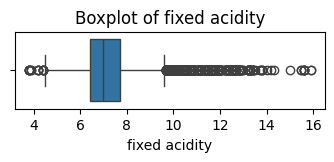

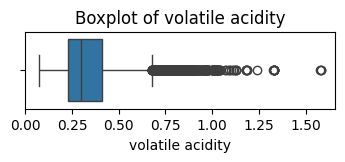

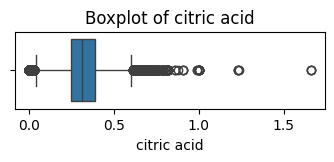

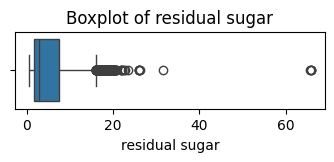

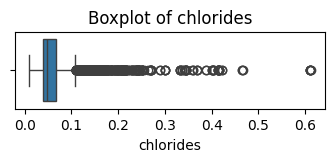

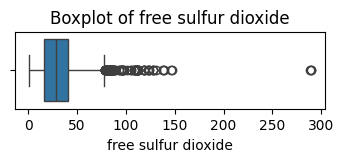

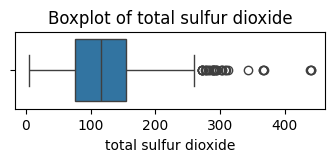

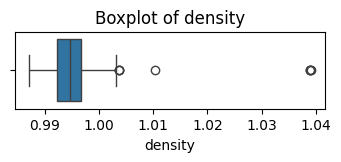

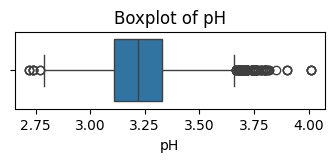

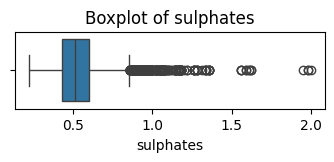

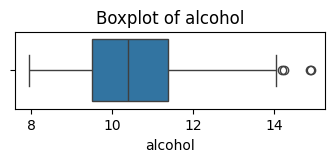

In [12]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

columns_to_boxplot = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

for column in columns_to_boxplot:
    plt.figure(figsize=(4,1))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [13]:
boxplot_cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

for col in boxplot_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
df.shape

(8863, 12)

In [14]:
df = df.reset_index(drop=True)

In [15]:
corr_matrix = df.corr()['quality']
corr_matrix

fixed acidity          -0.097368
volatile acidity       -0.161134
citric acid             0.058265
residual sugar         -0.076368
chlorides              -0.274758
free sulfur dioxide     0.059616
total sulfur dioxide   -0.113560
density                -0.333999
pH                      0.070194
sulphates               0.050363
alcohol                 0.457359
quality                 1.000000
Name: quality, dtype: float64

### Data Visualization

Let's visualize the data to gain further insights into the distributions of features and their relationships with the target variable, `quality`.

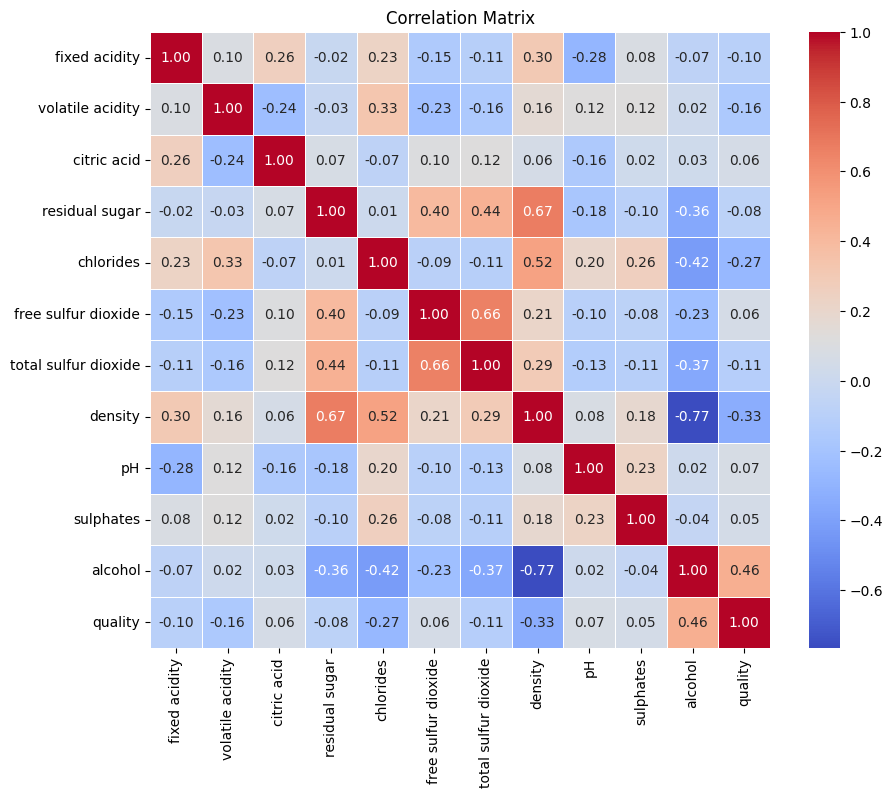

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

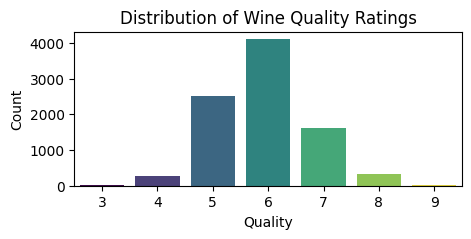

In [17]:
# Distribution of Wine Quality
plt.figure(figsize=(5,2))
sns.countplot(x='quality', data=df, palette='viridis', hue='quality', legend=False)
plt.title('Distribution of Wine Quality Ratings')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

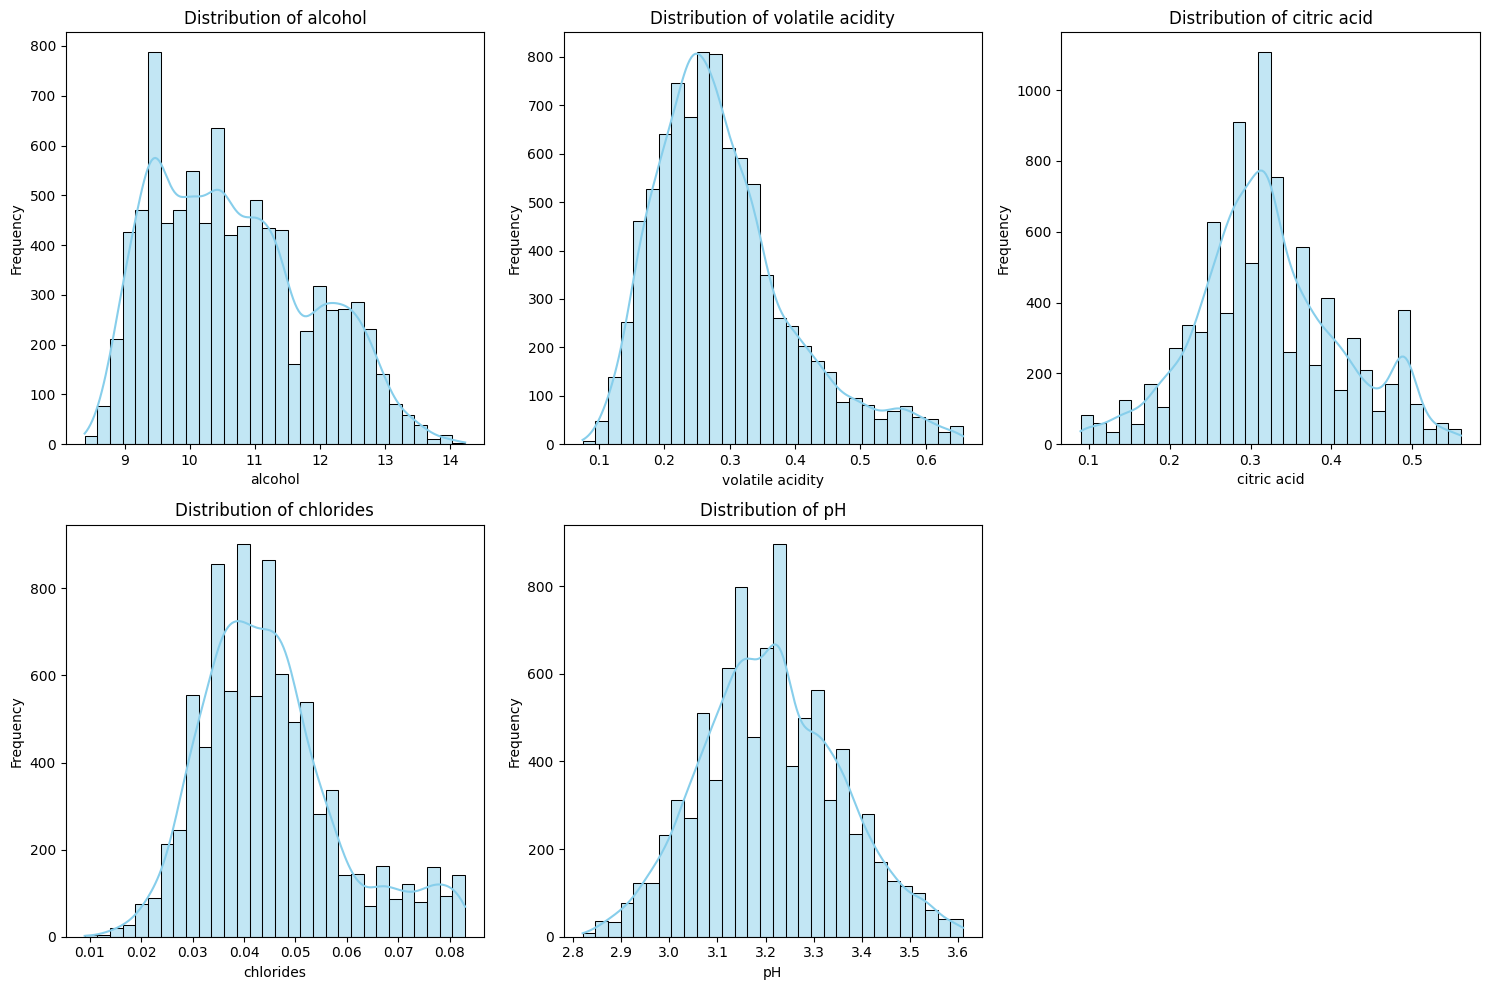

In [18]:
# Histograms
hist_cols = ['alcohol', 'volatile acidity', 'citric acid', 'chlorides', 'pH']

plt.figure(figsize=(15, 10))
for i in range(len(hist_cols)):
    feature = hist_cols[i]
    plt.subplot(2, 3, i + 1) #position of subplots
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue') #bins- 30 bars
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout() #everything fits neatly
plt.show()



 These plots revealed the individual distributions of key wine properties like alcohol, volatile acidity, citric acid, chlorides, and pH, showing their typical ranges and spread within the dataset.

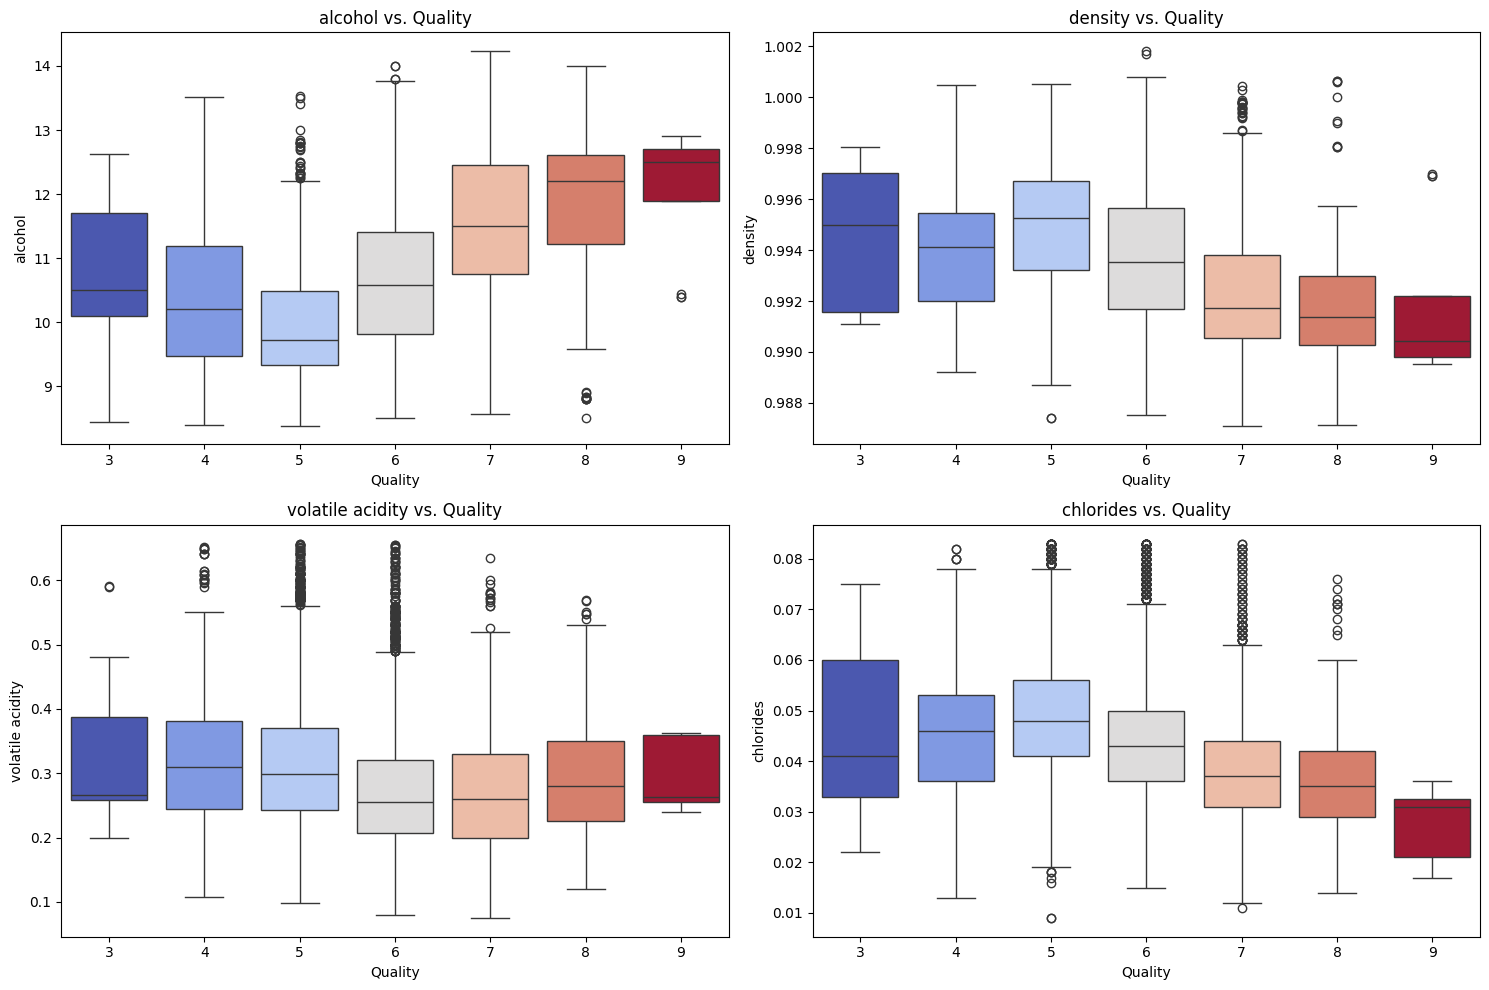

In [19]:
# Box plots for features vs. Quality
boxplot_features = ['alcohol', 'density', 'volatile acidity', 'chlorides']

plt.figure(figsize=(15, 10))
for i in range(len(boxplot_features)):
    feature = boxplot_features[i]
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x='quality', y=feature, data=df, palette='coolwarm', hue='quality', legend=False) # Modified to address FutureWarning
    plt.title(f'{feature} vs. Quality')
    plt.xlabel('Quality')
    plt.ylabel(feature)
plt.tight_layout()
plt.show()

These visualizations clearly demonstrated how the distributions of features such as alcohol, density, volatile acidity, and chlorides vary across different wine quality ratings, highlighting their distinct patterns at various quality levels.

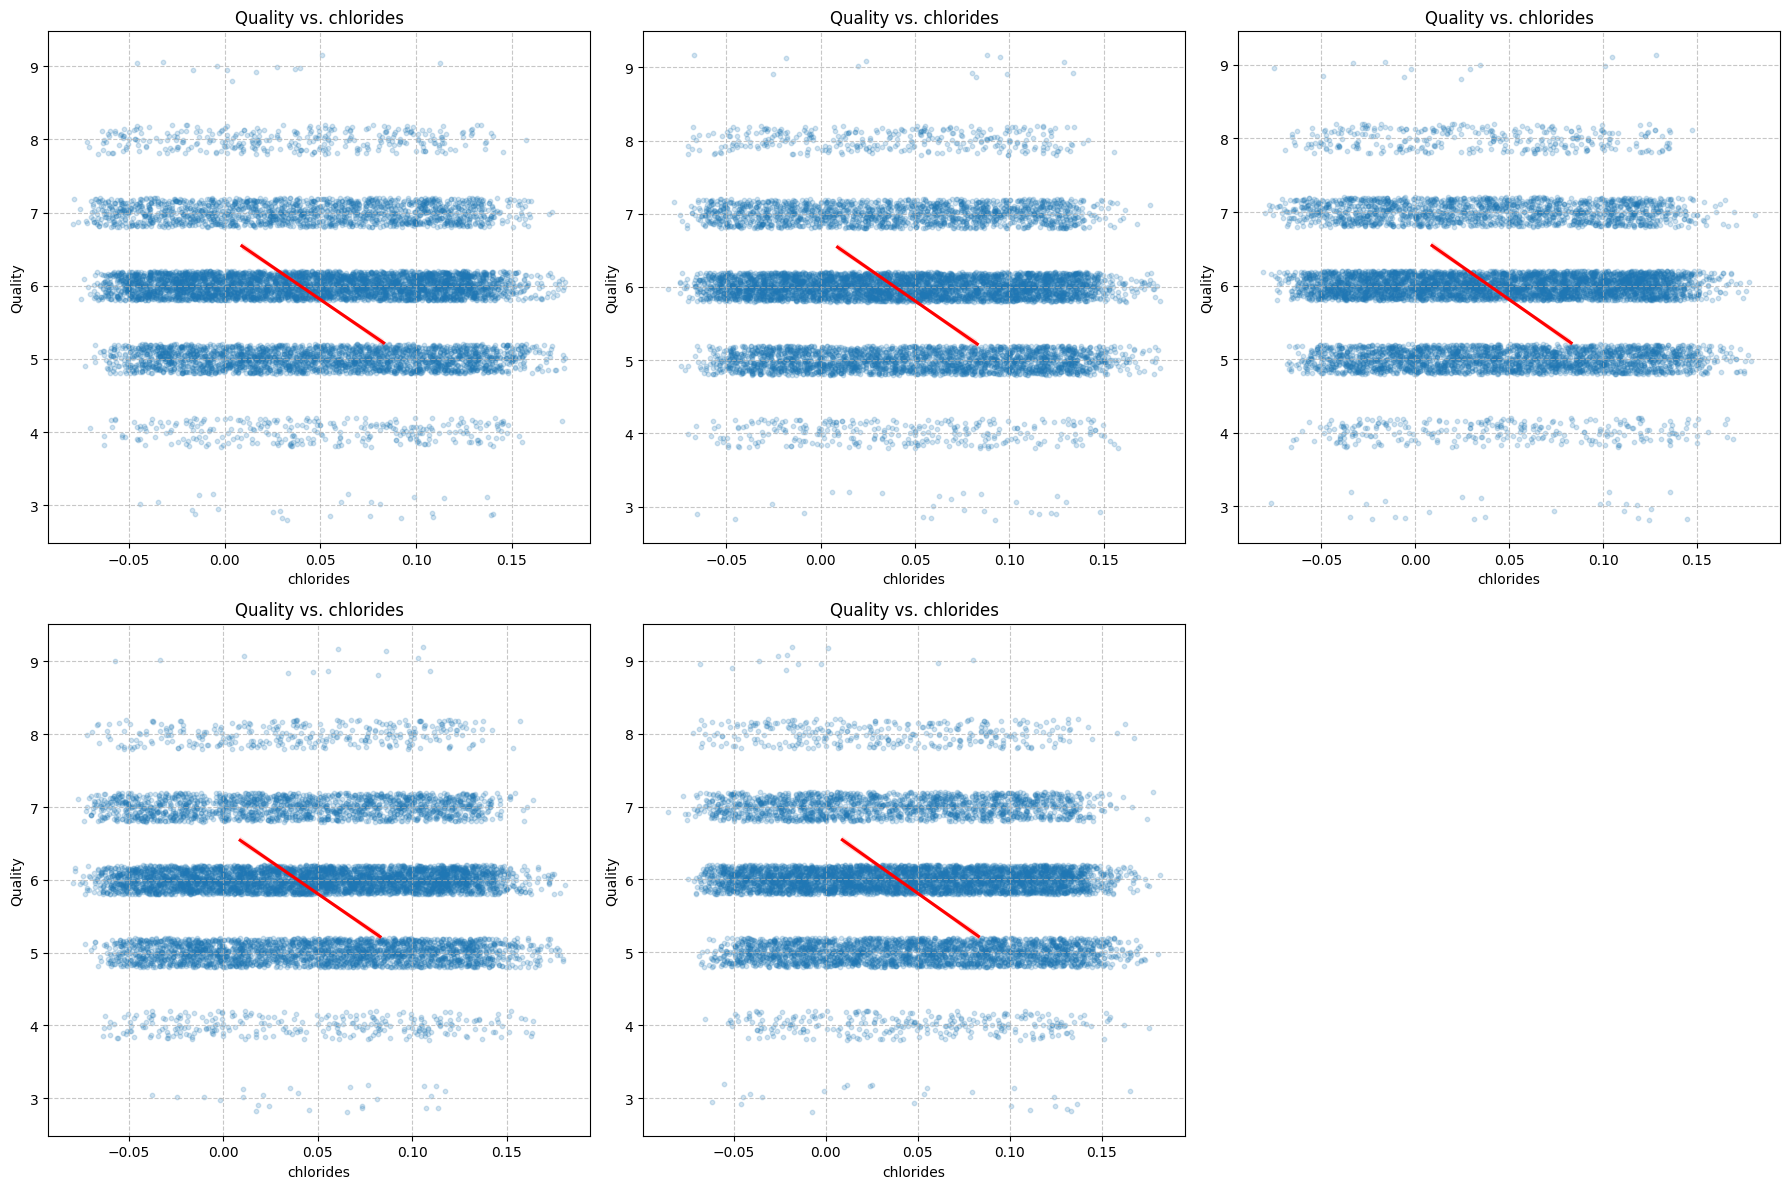

In [20]:
#scatter plot
scatter_features = ['alcohol', 'sulphates', 'volatile acidity', 'density', 'citric acid']

plt.figure(figsize=(18, 12))
for i in range(len(scatter_features)):
    features = scatter_features[i]
    plt.subplot(2, 3, i + 1)
    sns.regplot(x=feature, y='quality', data=df,
                x_jitter=0.1, y_jitter=0.2, # Add jitter to better see point density for discrete quality.  Adds a small amount of random noise (jitter) to the x and y coordinates of the points. This is particularly useful when one or both variables are discrete (like quality), as it helps to visualize the density of points that would otherwise overlap.
                scatter_kws={'alpha':0.2, 's':10}, # Adjust transparency and size of scatter points
                line_kws={'color':'red'}) # Color the regression line. kws- dictionaries that allows you to pass additional keyword arguments
    plt.title(f'Quality vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Quality')
    plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

These plots, along with their regression lines, illustrated the general trends and relationships between individual features and wine quality, showing how qualities tend to increase or decrease with changes in these chemical properties.

CONCLUSION: Through these visualizations, we've clearly observed the class imbalance in wine quality ratings, with most wines falling into the middle categories. We've identified strong relationships: alcohol content positively correlates with quality, while volatile acidity and density show negative correlations, meaning lower values of these often indicate better quality. The plots also revealed feature distributions and how they vary across quality categories, offering crucial insights into the key chemical properties that distinguish wine quality levels, which is vital for effective model building

In [21]:
x=df.drop('quality',axis=1)
y=df['quality']

In [22]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [23]:
y.value_counts()

quality
6    4108
5    2505
7    1611
8     319
4     283
3      25
9      12
Name: count, dtype: int64

In [24]:
y_train.value_counts()

quality
6    3286
5    2004
7    1289
8     255
4     226
3      20
9      10
Name: count, dtype: int64

In [25]:
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
x_train_bal, y_train_bal = ros.fit_resample(x_train, y_train)
df.shape

(8863, 12)

In [26]:
y_train_bal.value_counts()

quality
7    3286
6    3286
4    3286
5    3286
8    3286
9    3286
3    3286
Name: count, dtype: int64

Here we use `StandardScaler`- ensure that no single feature dominates the learning process due to its scale, leading to better model performance.

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train_bal)
x_test_std = scaler.transform(x_test)

df.shape

(8863, 12)

### Model Implementation and Evaluation


Here the dataset is treated as a multi-class problem because wine quality is discrete and integer-based, allowing for easier class balancing. Regression would produce less meaningful, continuous float outputs that don't align with these distinct quality scores.

In [28]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
nb = GaussianNB()
nb.fit(x_train_std,y_train_bal)

y_pred = nb.predict(x_test_std)
y_train_pred = nb.predict(x_train_std)
print('Training score=',accuracy_score(y_train_bal,y_train_pred))
print('Testing score=',accuracy_score(y_test,y_pred))

Training score= 0.4108338405356056
Testing score= 0.281443880428652


Naive Bayes performs poorly because features are dependent, but it works fine with numerical data—especially using Gaussian Naive Bayes.

In [29]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train_std,y_train_bal)

y_pred = log_model.predict(x_test_std)
y_train_pred = log_model.predict(x_train_std)
print('Training score=',accuracy_score(y_train_bal,y_train_pred))
print('Testing score=',accuracy_score(y_test,y_pred))

Training score= 0.5439526997652379
Testing score= 0.332205301748449


c:\Users\nmnni\OneDrive\Desktop\datascience luminar\project wine\PROJECT_WINE\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


it didn't find an optimal solution within the default number of iterations. This suggests the model struggled to learn the patterns effectively. Second, Logistic Regression is a linear model, and the relationship between wine physicochemical properties and quality might be more complex and non-linear, which a simple linear model might not fully capture, leading to lower accuracy

In [30]:
from sklearn.linear_model import LogisticRegression #Multiclass Logistic Regression (softmax)
from sklearn.metrics import accuracy_score

log_multi = LogisticRegression(solver='lbfgs',max_iter=2000,random_state=42)
log_multi.fit(x_train_std, y_train_bal)

y_pred = log_multi.predict(x_test_std)
y_train_pred = log_multi.predict(x_train_std)
print('Training score=',accuracy_score(y_train_bal,y_train_pred))
print('Testing score=',accuracy_score(y_test,y_pred))


Training score= 0.5434310059994784
Testing score= 0.3310772701635646


Softmax is a mathematical function used in multiclass classification (happens with behind the scene) that converts raw model outputs (scores/logits) into probabilities that sum to 1. The class with the highest probability becomes the prediction

Logistic regression doesn’t know the optimal coefficients automatically — a solver iteratively searches for them.

solver- the algorithm used to find the best model weights by minimizing the loss function.(lbfgs- used in multiclass, medium datasets)

max_iter-maximum number of optimization steps the solver can take while trying to find the best model weights. - searching for the best weights step by step. Solver keeps adjusting weights to reduce error

Still logistic regression, being a linear model, struggles to capture the complex, non-linear relationships present between the physicochemical properties and the wine quality categorie

In [31]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', decision_function_shape='ovr',random_state=42)
svm_model.fit(x_train_std, y_train_bal)

y_pred = svm_model.predict(x_test_std)
y_train_pred = svm_model.predict(x_train_std)
print('Training score=',accuracy_score(y_train_bal,y_train_pred))
print('Testing score=',accuracy_score(y_test,y_pred))

Training score= 0.8318407095035214
Testing score= 0.5595036661026509


In [32]:
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score

# svm_model_gdt = SVC(random_state=42)
# param_grid_svm = {
#     'C': [0.1, 1, 10, 100],
#     'gamma': [0.001, 0.01, 0.1, 1],
#     'kernel': ['rbf'] # Keeping kernel as rbf as it was used previously #
# }
# # C decides tolerance for errors- decrease error and create more complex boundary- implemented through penalty term
# # Gamma decides shape/curvature of decision boundary (gamma increases-complexity of curvature increases-overfitting-correcctly classifies)

# grid_search_svm = GridSearchCV(
#     estimator=svm_model_gdt,
#     param_grid=param_grid_svm,
#     cv=5, # 5-fold cross-validation
#     scoring='accuracy', #accuracy will be used as the metric to evaluate the performance of each model configuration (each combination of hyperparameters) during cross-validation.
#     n_jobs=-1, # Use all available cores
#     verbose=2
# )

# # Evaluate using accuracy
# # Speed up by using all processors
# # Show detailed progress during tuning

# # Fit GridSearchCV to the scaled training data
# grid_search_svm.fit(x_train_std, y_train_bal)
# svm_model_gdt_best = grid_search_svm.best_estimator_


# y_pred = svm_model_gdt_best.predict(x_test_std)
# y_train_pred = svm_model_gdt_best.predict(x_train_std)
# print('Training score =', accuracy_score(y_train_bal, y_train_pred))
# print('Testing score =', accuracy_score(y_test, y_pred))

In [33]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=5)
dt_model.fit(x_train_std,y_train_bal)

y_pred = dt_model.predict(x_test_std)
y_train_pred = dt_model.predict(x_train_std)
print('Training score=',accuracy_score(y_train_bal,y_train_pred))
print('Testing score=',accuracy_score(y_test,y_pred))

Training score= 0.5721241631162508
Testing score= 0.35250987027636776


### Hyperparameter Tuning for Decision Tree with GridSearchCV

We will use `GridSearchCV` to systematically search for the best combination of hyperparameters for our `DecisionTreeClassifier`. This involves defining a range of values for key parameters like `max_depth`, `min_samples_split`, and `min_samples_leaf`, and then letting `GridSearchCV` evaluate all combinations using cross-validation.

In [34]:
from sklearn.model_selection import GridSearchCV

dt_model_gdt = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': [None, 5, 10, 15],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 3, 5],'criterion': ['gini', 'entropy']}
grid_search_dt = GridSearchCV(estimator=dt_model_gdt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_dt.fit(x_train_std, y_train_bal)
print(f"Best parameters for Decision Tree: {grid_search_dt.best_params_}")

dt_model_gdt_best = grid_search_dt.best_estimator_

y_pred = dt_model_gdt_best.predict(x_test_std)
y_train_pred = dt_model_gdt_best.predict(x_train_std)
print('Training score=',accuracy_score(y_train_bal,y_train_pred))
print('Testing score=',accuracy_score(y_test,y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Training score= 1.0
Testing score= 0.8296672306824591


In [35]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(x_train_std, y_train_bal)

y_pred = knn_model.predict(x_test_std)
y_train_pred = knn_model.predict(x_train_std)
print('Training score=',accuracy_score(y_train_bal,y_train_pred))
print('Testing score=',accuracy_score(y_test,y_pred))

Training score= 0.9560038257542822
Testing score= 0.7236322617033277


### Feature Selection with SelectKBest

`SelectKBest` is a feature selection technique that removes all but the `k` highest scoring features. The scoring function determines how features are ranked. For classification tasks, common scoring functions include `f_classif` (ANOVA F-value) for numerical features or `chi2` (chi-squared) for non-negative features. We'll use `f_classif` to select the top features.

In [36]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

k_features = 8 #no. of 1st 8 best features
selector = SelectKBest(score_func=f_classif, k=k_features)
x_train_selected = selector.fit_transform(x_train_std, y_train_bal)
x_test_selected = selector.transform(x_test_std)

knn_model_selected = KNeighborsClassifier(n_neighbors=5)
knn_model_selected.fit(x_train_selected, y_train_bal)

y_pred = knn_model_selected.predict(x_test_selected)
y_train_pred = knn_model_selected.predict(x_train_selected)
print('Training score=',accuracy_score(y_train_bal,y_train_pred))
print('Testing score=',accuracy_score(y_test,y_pred))

Training score= 0.9523519693939657
Testing score= 0.7241962774957699


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(x_train_std, y_train_bal)

y_pred= rf_model.predict(x_test_std)
y_train_pred = rf_model.predict(x_train_std)
print('Training score=',accuracy_score(y_train_bal,y_train_pred))
print('Testing score=',accuracy_score(y_test,y_pred))

classification_report_rf = classification_report(y_test, y_pred)
print(classification_report_rf)


Training score= 1.0
Testing score= 0.9086294416243654
              precision    recall  f1-score   support

           3       0.80      0.80      0.80         5
           4       1.00      0.88      0.93        57
           5       0.92      0.92      0.92       501
           6       0.91      0.92      0.91       822
           7       0.88      0.89      0.88       322
           8       0.93      0.88      0.90        64
           9       1.00      0.50      0.67         2

    accuracy                           0.91      1773
   macro avg       0.92      0.83      0.86      1773
weighted avg       0.91      0.91      0.91      1773



In [38]:
#rf model
if accuracy_score(y_train_bal,y_train_pred)>accuracy_score(y_test,y_pred)+.1:
  print('over fit')
elif accuracy_score(y_train_bal,y_train_pred)<.60:
  pass
else:
  print('good fit')

good fit


Handles non-linearity

Captures feature interactions

Robust to outliers, noise, imbalance

Automatically reduces overfitting via bagging

Works great with numerical tabular data

### Confusion Matrix for Random Forest Classifier

We will now generate and visualize the confusion matrix for the Random Forest model's predictions on the test set. This will help us understand where the model is performing well and where it is making errors across different quality classes.

[[  4   0   1   0   0   0   0]
 [  0  50   4   3   0   0   0]
 [  0   0 461  40   0   0   0]
 [  1   0  34 753  34   0   0]
 [  0   0   0  32 286   4   0]
 [  0   0   1   3   4  56   0]
 [  0   0   0   0   1   0   1]]


<Figure size 1000x800 with 0 Axes>

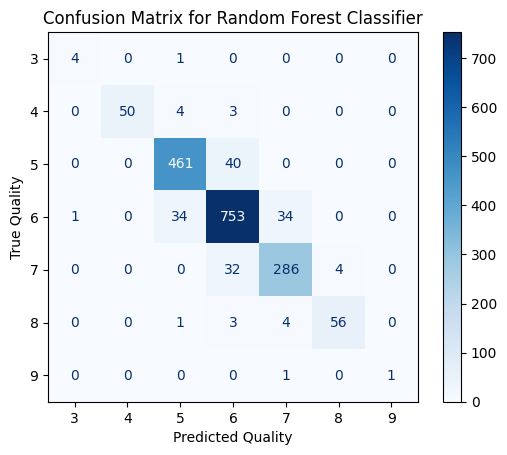

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming y_pred_rf contains the predictions from your Random Forest model
# and y_test contains the true labels for the test set.

cm = confusion_matrix(y_test, y_pred, labels=sorted(y_test.unique()))
print(confusion_matrix(y_test, y_pred))

class_labels = sorted(y_test.unique())

plt.figure(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted Quality')
plt.ylabel('True Quality')
plt.show()

This way, in the diagonal, you find the elements that were correctly classified (predicted class matches true class) while in the non-diagonal elements, you see the number of misclassified elements. The higher the counts in the diagonal, the better your classifier is.

This project successfully tackled the multi-class classification of wine quality based on physicochemical properties. After comprehensive data preprocessing, including handling missing values, outlier removal, and addressing class imbalance via oversampling, we explored various machine learning models. The Random Forest Classifier emerged as the most robust, achieving an accuracy of approximately 90.86%, demonstrating its superior ability to capture complex relationships in the data. The visualizations further underscored the importance of features like alcohol content, volatile acidity, and density in distinguishing wine quality

In [40]:
import pickle
# pickle.dump(rf_model,open('rfmodel.sav','wb'))
# pickle.dump(scaler,open('stdscaler.sav','wb'))